**Important: This notebook will only work with fastai-0.7.x. Do not try to run any fastai-1.x code from this path in the repository because it will load fastai-0.7.x**

# Intro to Random Forests

## About this course

### Teaching approach

In [108]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [110]:
PATH = "data/houseprices/"

In [111]:
!pwd

/c/Code/fastai/courses/ml1


In [112]:
!ls {PATH}

data_description.txt
sample_submission.csv
test.csv
train.csv


In [113]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False)

In [114]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [115]:
display_all(df_raw.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [116]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's important to note what metric is being used for a project. Generally, selecting the metric(s) is an important part of the project setup. However, in this case Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.

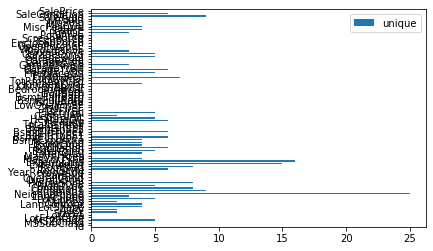

In [117]:
df_raw.describe(include='all').T[['unique']].plot.barh()

In [118]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

### Initial processing

In [119]:
train_cats(df_raw)

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest.

In [120]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

But let's save this file for now, since it's already in format can we be stored and accessed efficiently.

In [121]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/houseprices-raw')

ArrowIOError: Failed to open local file 'tmp/houseprices-raw', error: The requested operation cannot be performed on a file with a user-mapped section open.


### Pre-processing

In the future we can simply read it from this fast format.

In [36]:
df_raw = pd.read_feather('tmp/houseprices-raw')

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [40]:
df, y, nas = proc_df(df_raw, 'SalePrice')

We now have something we can pass to a random forest!

In [122]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=99)
m.fit(df, y)
m.score(df,y)

0.966137311133911

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). https://en.wikipedia.org/wiki/Coefficient_of_determination

In [123]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 400  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1060, 83), (1060,), (400, 83))

# Random Forests

## Base model

Let's try our model again, this time with separate training and validation sets.

In [124]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [125]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=99,oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 1.35 s
[0.05963142779850772, 0.14483776454059152, 0.9785087492823242, 0.8536188416328226, 0.863921111620378]


An r^2 in the high-80's isn't bad at all (and the RMSLE puts us around rank 100 of 470 on the Kaggle leaderboard), but we can see from the validation set score that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.

## Speeding things up

## Single tree

In [49]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.21168554305506201, 0.2312282585974746, 0.7291719312935654, 0.6269187955728913]


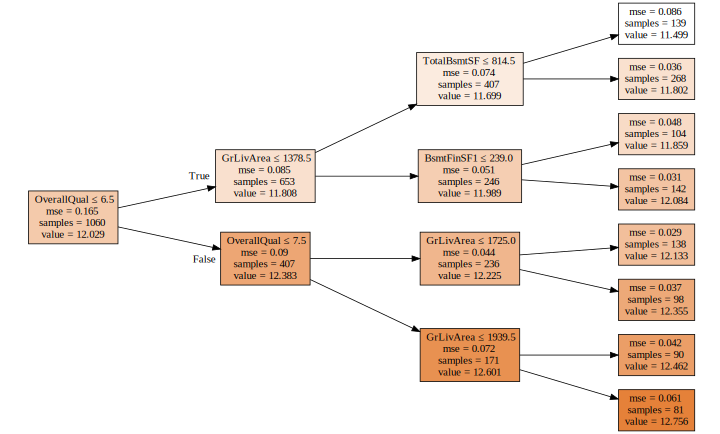

In [51]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
draw_tree(m.estimators_[0], df, precision=3)

Let's see what happens if we create a bigger tree.

In [52]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[3.155355899391085e-05, 0.21190551572937324, 0.9999999939826125, 0.6866670442303957]


The training set result looks great! But the validation set is worse than our original model. This is why we need to use *bagging* of multiple trees to get more generalizable results.

## Bagging

### Intro to bagging

To learn about bagging in random forests, let's start with our basic model again.

In [62]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=99)
m.fit(X_train, y_train)
print_score(m)

[0.05492492385216201, 0.1438356239006853, 0.9817673329435475, 0.8556374728151633]


We'll grab the predictions for each individual tree, and look at one example.

In [167]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([12.13249, 12.45509, 12.48677, 12.37762, 12.11765, 12.44448, 12.3539 , 12.36818, 12.14346, 12.16987,
        12.64449, 12.38172, 12.27146, 12.23219, 12.17682, 12.27568, 12.29834, 12.10345, 12.46272, 12.14022,
        12.23351, 12.68539, 12.46465, 12.2966 , 12.33063, 12.38979, 12.15092, 12.28603, 12.23947, 12.15382,
        12.13461, 12.4916 , 12.27775, 12.29913, 12.26847, 12.65961, 12.30656, 12.101  , 12.24272, 12.27654,
        12.14075, 12.47111, 12.34901, 12.47423, 12.39377, 12.69627, 12.13735, 12.6007 , 12.14465, 12.23577,
        12.3173 , 12.34998, 12.11413, 12.41067, 12.35175, 12.35821, 12.11194, 12.19871, 12.11774, 12.33639,
        12.14736, 12.46997, 12.27724, 12.25706, 12.40284, 12.40308, 12.20918, 12.30931, 12.18664, 12.4158 ,
        12.60419, 12.11172, 12.26756, 12.61765, 12.12274, 12.36382, 12.18811, 12.45411, 12.09163, 12.13061,
        12.11481, 12.44515, 12.63431, 12.13054, 12.40979, 12.13199, 12.5041 , 12.31107, 12.64849, 12.10337,
        12.09257, 12.15676, 

In [168]:
preds.shape

(149, 400)

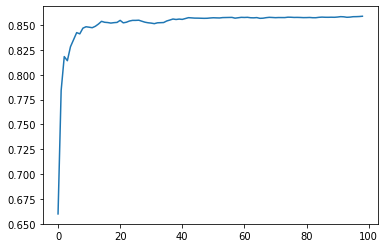

In [169]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(99)]);

In [170]:
np.argmax([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(99)])

98

In [67]:
print_score(m) # 99 trees

[0.05492492385216202, 0.14383562390068527, 0.9817673329435475, 0.8556374728151637]


In [70]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=24)
m.fit(X_train, y_train)
print_score(m)

[0.05982693119869245, 0.14073401028567414, 0.9783675988755509, 0.8617962969525237]


The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [53]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10246327590278419, 0.3640688465673624, 0.9773180301352264, 0.7495389916863923]


In [54]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09657886264650363, 0.36416366571298026, 0.9798484494264761, 0.7494085131156123]


In [55]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.094465564383976, 0.3634271114492856, 0.9807206963871963, 0.750421176301737]


### Out-of-bag (OOB) score

Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called *out-of-bag (OOB) error* which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was *not* included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our `print_score` function below.

In [71]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.05652696203424838, 0.13998118183180838, 0.9806882084286045, 0.8632709284142369, 0.8613786521232305]


In [72]:
m = RandomForestRegressor(n_estimators=24, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

c:\python\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[0.05658237686994761, 0.14716755357780684, 0.9806503261766303, 0.8488717358268396, 0.021136979641895093]


This shows that our validation set time difference is making an impact, as is model over-fitting.

## Reducing over-fitting

### Subsampling

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: *subsampling*. Let's return to using our full dataset, so that we can demonstrate the impact of this technique.

In [126]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a *different* random subset per tree. That way, given enough trees, the model can still see *all* the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [58]:
X_train.shape, X_valid.shape

((389125, 66), (12000, 66))

In [76]:
set_rf_samples(1200)

In [127]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True,n_estimators=40)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 546 ms
[0.05918541106041582, 0.14807899745176867, 0.9788290371037338, 0.8469939921141598, 0.8619703875328975]


In [79]:
set_rf_samples(1000)

In [82]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True,n_estimators=40)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 419 ms
[0.06092865104950948, 0.14009923265288934, 0.9775635366393045, 0.8630402147558822, 0.8552203768888235]


Since each additional tree allows the model to see more data, this approach can make additional trees more useful.

In [83]:
m = RandomForestRegressor(n_estimators=50, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.06047506886333493, 0.14062818304687627, 0.9778963488550153, 0.8620040678706167, 0.8621944609965175]


### Tree building parameters

We revert to using a full bootstrap sample in order to show the impact of other over-fitting avoidance methods.

In [62]:
reset_rf_samples()

Let's get a baseline for this full set to compare to.

In [97]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [64]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07834429883279093, 0.23795464121981183, 0.9871722755547754, 0.8988801692727498, 0.90851629300197]


In [65]:
t=m.estimators_[0].tree_

In [66]:
dectree_max_depth(t)

50

In [95]:
m = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08129645486424422, 0.1461874556200206, 0.9600557299197889, 0.8508779834991428, 0.8593782546905321]


In [96]:
t=m.estimators_[0].tree_

In [98]:
dectree_max_depth(t)

15

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with `min_samples_leaf`) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better
- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [104]:
m = RandomForestRegressor(n_estimators=199, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07961342132345657, 0.14157060177087513, 0.9616924964895284, 0.8601483130448757, 0.8647138891939848]


We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

- None
- 0.5
- 'sqrt'

- 1, 3, 5, 10, 25, 100

In [128]:
m = RandomForestRegressor(n_estimators=199, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0802352584850798, 0.13950494973797456, 0.9610917420337498, 0.8641996819398703, 0.8741092967013575]


In [129]:
m = RandomForestRegressor(n_estimators=99, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08066689729110933, 0.1394086847699186, 0.960671989216292, 0.8643870344729093, 0.8696713162492611]


In [130]:
m = RandomForestRegressor(n_estimators=49, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08297764513831246, 0.14143149174255348, 0.958386572720695, 0.8604230199906832, 0.8637535879197807]


In [131]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
17,OverallQual,0.404700
46,GrLivArea,0.138377
19,YearBuilt,0.060608
38,TotalBsmtSF,0.046136
61,GarageCars,0.040810
27,ExterQual,0.040197
62,GarageArea,0.039565
43,1stFlrSF,0.024280
34,BsmtFinSF1,0.017286
4,LotArea,0.015073


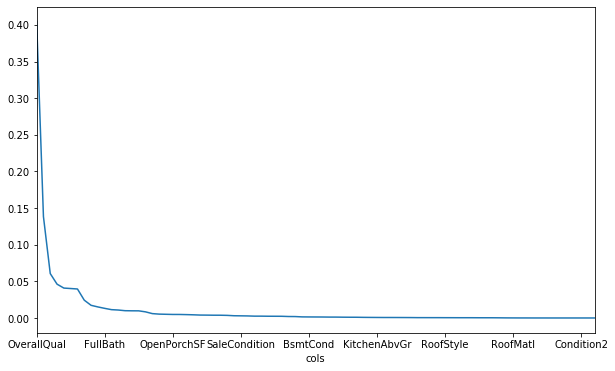

In [132]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

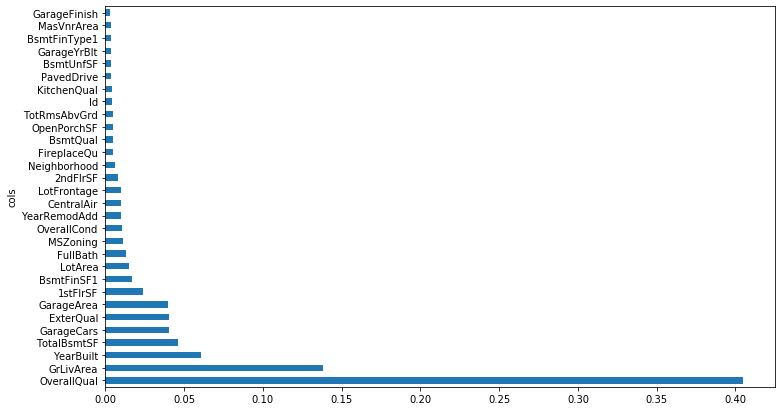

In [134]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [160]:
to_keep = fi[fi.imp>0.009].cols; len(to_keep)

16

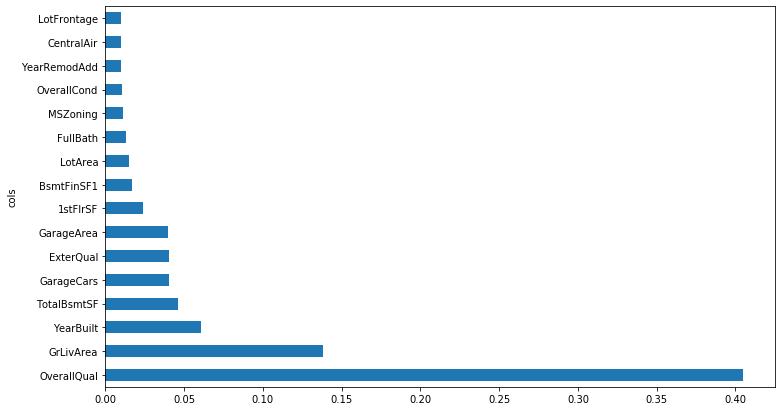

In [161]:
plot_fi(fi[:16]);

In [184]:
df_keep = df_trn[to_keep]

In [163]:
X_train, X_valid = split_vals(df_keep, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [179]:
m = RandomForestRegressor(n_estimators=98, min_samples_leaf=2, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0736076601838375, 0.13981720746769177, 0.9672540721969023, 0.863591070462089, 0.8721299383403265]


## Dropping corellated feature - GarageArea

In [181]:
df_keep.drop('GarageArea', axis=1); None

In [182]:
X_train, X_valid = split_vals(df_keep, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [183]:
m = RandomForestRegressor(n_estimators=98, min_samples_leaf=2, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07419828350499988, 0.1398241808934615, 0.9667264612904081, 0.863577463249024, 0.8727423106075262]


## Dropping corellated feature - GarageCars

In [185]:
df_keep = df_trn[to_keep]

In [186]:
df_keep.drop('GarageCars', axis=1); None

In [187]:
X_train, X_valid = split_vals(df_keep, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [188]:
m = RandomForestRegressor(n_estimators=98, min_samples_leaf=2, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0748432885365288, 0.14212372728212483, 0.9661454537086536, 0.8590533589877303, 0.8713955191885738]
